# Plot individual k with bar plot
## TODO remove index

   index  Seed  Features (k)  0 vs Rest  1 vs Rest  2 vs Rest  OvR Macro AUC  \
0      0     0             2   0.744127   0.806316   0.712447       0.754297   
1      1     0          1000   0.821587   0.880455   0.736345       0.812796   
2      2     1             2   0.709841   0.784223   0.568540       0.687535   
3      3     1          1000   0.826032   0.898346   0.789916       0.838098   

     0 vs 1    0 vs 2    1 vs 2  OvO Macro AUC  
0  0.771275  0.707483  0.930876       0.803211  
1  0.882335  0.802721  0.882488       0.855848  
2  0.705684  0.529252  0.824885       0.686607  
3  0.882949  0.810204  0.919355       0.870836  

df_melted:
     Seed  Features (k)         Metric     Value
0      0             2          index  0.000000
1      0          1000          index  1.000000
2      1             2          index  2.000000
3      1          1000          index  3.000000
4      0             2      0 vs Rest  0.744127
5      0          1000      0 vs Rest  0.821587
6    

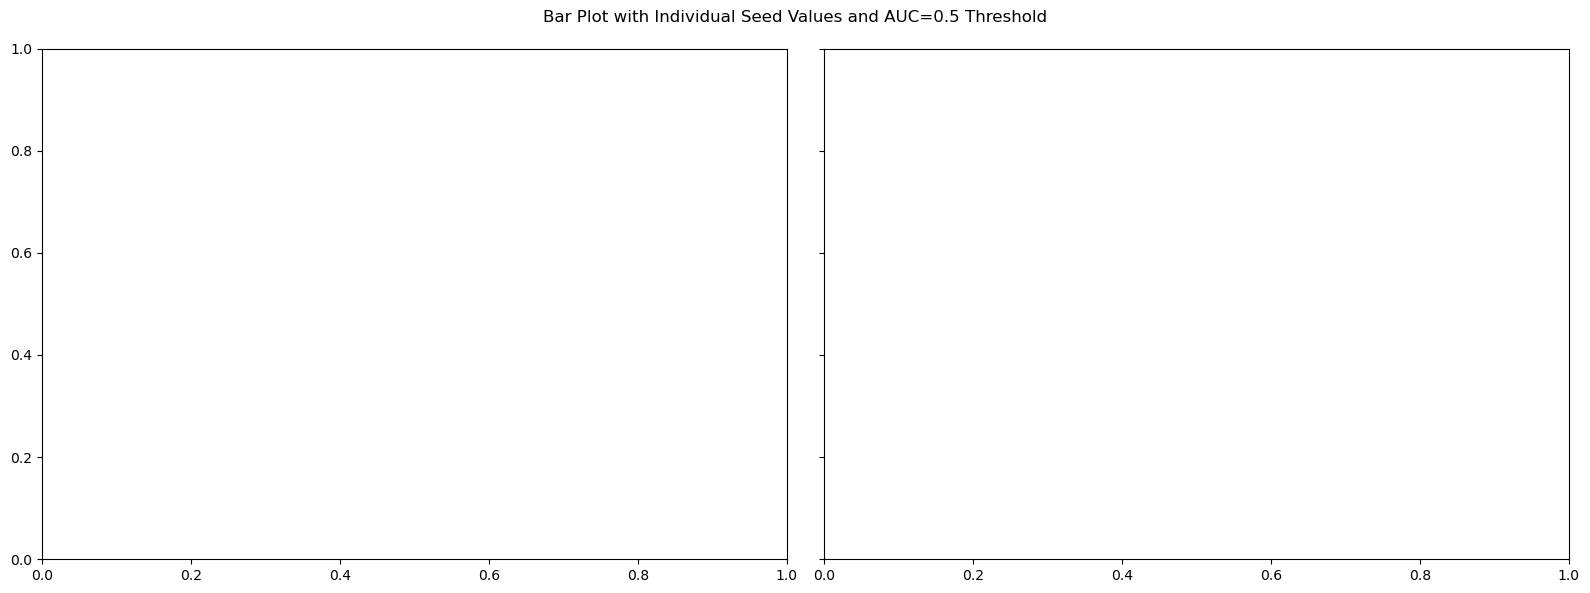

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
# Resetting the index to simplify handling hierarchical index
df=pd.read_csv("test_clf.csv", index_col=0)

df = df.reset_index()

print(df)

# Melting the dataframe to long format for seaborn compatibility
df_melted = df.melt(
    id_vars=["Seed", "Features (k)"], 
    var_name="Metric", 
    value_name="Value"
)

print("\ndf_melted:\n",df_melted)

# Initialize the subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)


# Iterate over the two subsets (10 and 100 features)
for i, features in enumerate([10, 100]):
    
    subset = df_melted[df_melted["Features (k)"] == features]

    # Check if subset is empty
    if subset.empty:  
        print(f"Warning: No data for Features (k) = {features}")
        # Skip plotting for this subset
        continue  

    # Plot barplot for averages with error bars
    sns.barplot(
        data=subset, 
        x="Metric", 
        y="Value", 
        ax=axes[i], 
        ci="sd", 
        color="skyblue",
        estimator="mean",
       
    )

    # Overlay stripplot for individual seed values
    sns.stripplot(
        data=subset, 
        x="Metric", 
        y="Value", 
        ax=axes[i], 
        hue="Seed",
        dodge=True, 
        jitter=True, 
        alpha=0.7,
        
    )

    # Add a horizontal dashed red line for AUC = 0.5
    axes[i].axhline(0.5, color="red", linestyle="--", linewidth=1.5)

    # Set subplot title
    axes[i].set_title(f"Features (k): {features}")

    # Rotate x-axis labels for clarity
    axes[i].tick_params(axis='x', rotation=90)
   


    
# Set overall title and adjust layout
fig.suptitle("Bar Plot with Individual Seed Values and AUC=0.5 Threshold")
fig.tight_layout()
plt.show()


#  Plot all k for all modes

/tmp/ipykernel_5194/1018015526.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap("tab10", len(ovr_metrics))  # Tab10 colormap for 4 colors


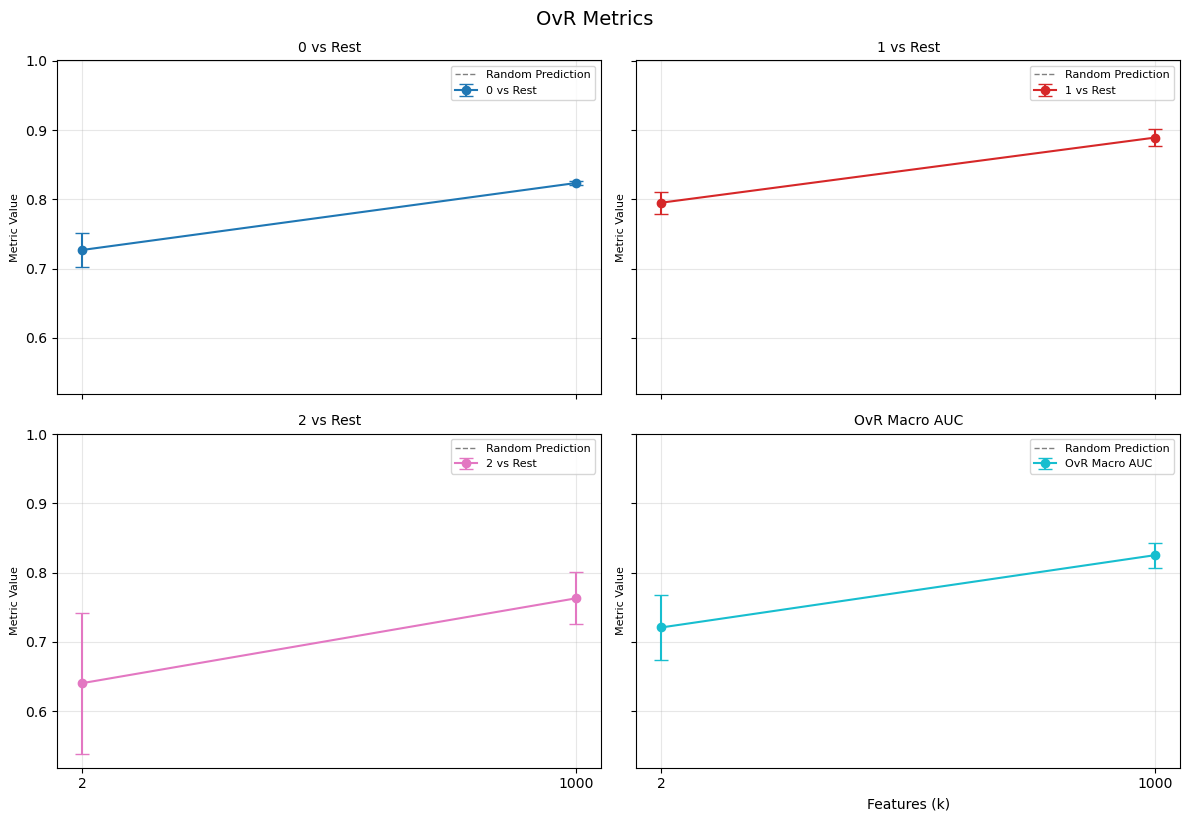

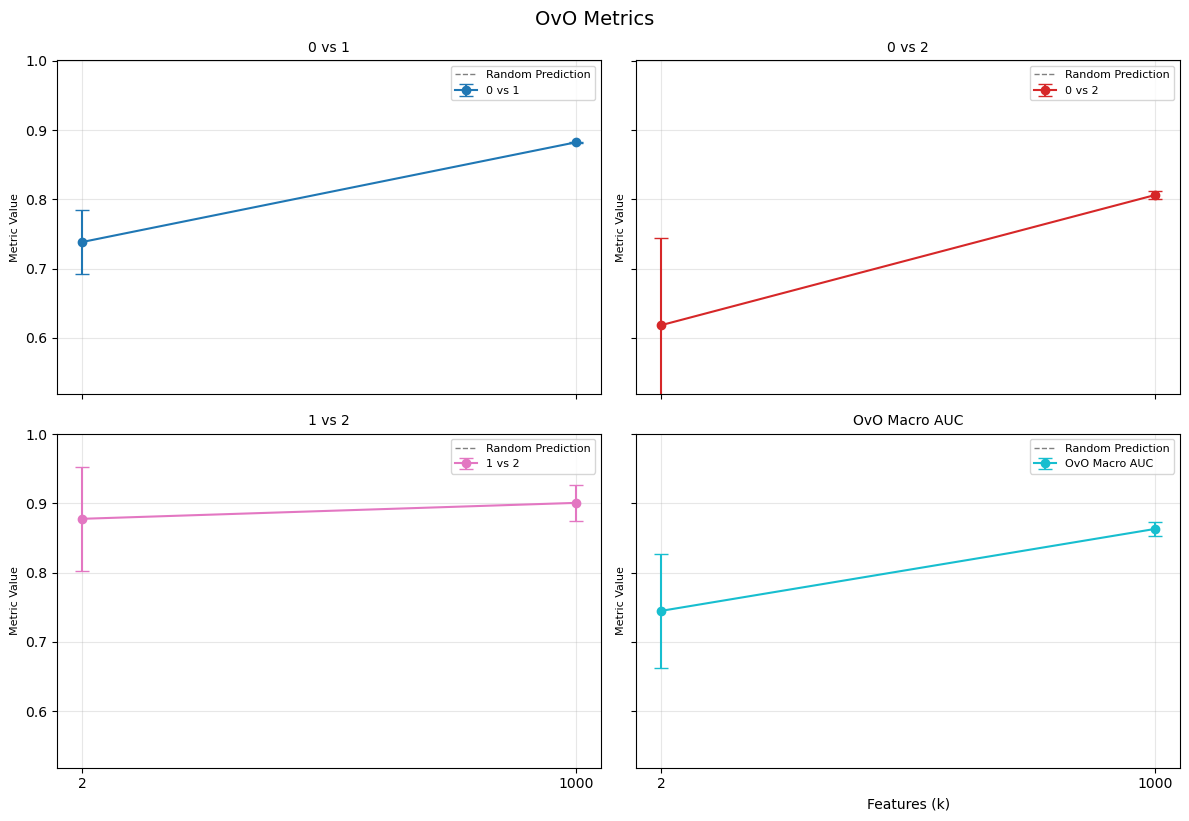

In [13]:
df = pd.read_csv("test_clf.csv", index_col = 0)
# print(df.head())


# Group by 'Features (k)' and calculate mean and std for each metric
metrics = df.columns[2:]  # All columns after 'Seed' and 'Features (k)'
summary = df.groupby("Features (k)").agg(["mean", "std"])

# Map 'Features (k)' to evenly spaced indices
features = summary.index
x_indices = range(len(features))

# Separate OvR and OvO metrics
ovr_metrics = ["0 vs Rest","1 vs Rest","2 vs Rest", "OvR Macro AUC"]
ovo_metrics = ["0 vs 1","0 vs 2","1 vs 2", "OvO Macro AUC"]

# Find the y-axis range for all metrics
y_min = min(summary[(metric, "mean")].min() for metric in metrics) - 0.1
y_max = max(summary[(metric, "mean")].max() for metric in metrics) + 0.1

# Generate a colormap
color_map = cm.get_cmap("tab10", len(ovr_metrics))  # Tab10 colormap for 4 colors

# Plot OvR metrics
fig_ovr, axes_ovr = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axes_ovr = axes_ovr.flatten()

for i, (ax, metric) in enumerate(zip(axes_ovr, ovr_metrics)):
    means = summary[(metric, "mean")]
    stds = summary[(metric, "std")]
    ax.errorbar(
        x_indices,
        means,
        yerr=stds,
        capsize=5,
        marker="o",
        color=color_map(i),
        label=metric,
    )
    ax.axhline(y=0.5, color="gray", linestyle="--", linewidth=1, label="Random Prediction")
    ax.set_title(f"{metric}", fontsize=10)
    ax.set_ylabel("Metric Value", fontsize=8)
    ax.grid(alpha=0.3)
    ax.legend(loc="best", fontsize=8)
    ax.set_ylim(y_min, y_max)  # Apply the same y-axis range

axes_ovr[-1].set_xticks(x_indices)
axes_ovr[-1].set_xticklabels(features)
axes_ovr[-1].set_xlabel("Features (k)", fontsize=10)

plt.tight_layout()
fig_ovr.suptitle("OvR Metrics", fontsize=14, y=1.02)
plt.show()

# Plot OvO metrics
fig_ovo, axes_ovo = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axes_ovo = axes_ovo.flatten()

for i, (ax, metric) in enumerate(zip(axes_ovo, ovo_metrics)):
    means = summary[(metric, "mean")]
    stds = summary[(metric, "std")]
    ax.errorbar(
        x_indices,
        means,
        yerr=stds,
        capsize=5,
        marker="o",
        color=color_map(i),
        label=metric,
    )
    ax.axhline(y=0.5, color="gray", linestyle="--", linewidth=1, label="Random Prediction")
    ax.set_title(f"{metric}", fontsize=10)
    ax.set_ylabel("Metric Value", fontsize=8)
    ax.grid(alpha=0.3)
    ax.legend(loc="best", fontsize=8)
    ax.set_ylim(y_min, y_max)  # Apply the same y-axis range

axes_ovo[-1].set_xticks(x_indices)
axes_ovo[-1].set_xticklabels(features)
axes_ovo[-1].set_xlabel("Features (k)", fontsize=10)

plt.tight_layout()
fig_ovo.suptitle("OvO Metrics", fontsize=14, y=1.02)
plt.show()

# Load HP multiomics data


In [15]:
X_raw_1 = pd.read_csv('input/HP_multiomics/Amplicon_X.csv', sep="\t", index_col=0)
X_raw_2 = pd.read_csv('input/HP_multiomics/RNA_X.csv', sep="\t", index_col=0)
y_raw = pd.read_csv('input/HP_multiomics/metadata.csv', sep = "\t", index_col=0)

print(X_raw_1.head())
print(X_raw_2.head())
print(y_raw.head())


       ASV1      ASV2      ASV3      ASV4      ASV5      ASV6      ASV7  \
0  0.017371  0.005184  0.023717  0.009881  0.001094  0.008298  0.000000   
1  0.000088  0.252867  0.023640  0.047785  0.000088  0.016262  0.000033   
2  0.034550  0.000064  0.033724  0.004670  0.000048  0.011914  0.000032   
3  0.009198  0.002934  0.044401  0.014516  0.020535  0.011961  0.000000   
4  0.008463  0.000466  0.000111  0.010617  0.001644  0.005753  0.009818   

       ASV8      ASV9     ASV10  ...  ASV6219  ASV6220  ASV6221  ASV6222  \
0  0.000202  0.009696  0.004646  ...      0.0      0.0      0.0      0.0   
1  0.001352  0.003870  0.000044  ...      0.0      0.0      0.0      0.0   
2  0.016282  0.011501  0.003654  ...      0.0      0.0      0.0      0.0   
3  0.006151  0.002328  0.007495  ...      0.0      0.0      0.0      0.0   
4  0.000866  0.006752  0.003798  ...      0.0      0.0      0.0      0.0   

   ASV6223  ASV6224  ASV6225  ASV6226   ASV6227  ASV6228  
0      0.0      0.0      0.0     

In [11]:
# make sure X and y have same index
index_intersect = y_raw.index.intersection(X_raw_1.index)
index_intersect = X_raw_1.index.intersection(X_raw_2.index)

X_raw_1 = X_raw_1.loc[index_intersect]
X_raw_2 = X_raw_2.loc[index_intersect]

# sort index 
X_1 = X_raw_1.sort_index()
X_2 = X_raw_2.sort_index()
y_raw = y_raw.sort_index()

# Merge both features dfs
X_3 = pd.concat([X_1, X_2], axis=1)

print(X_1.shape)  
print(X_2.shape)
print(X_3.shape)
print(y_raw.shape)

y = y_raw.loc[:,"Sample Condition"]


(132, 6228)
(132, 60839)
(132, 67067)
(132, 22)
